Exercise 1: Create a Single-Qubit Superposition

In [ ]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit import transpile 
from qiskit.visualization import plot_histogram

{'1': 50002909, '0': 49997091}


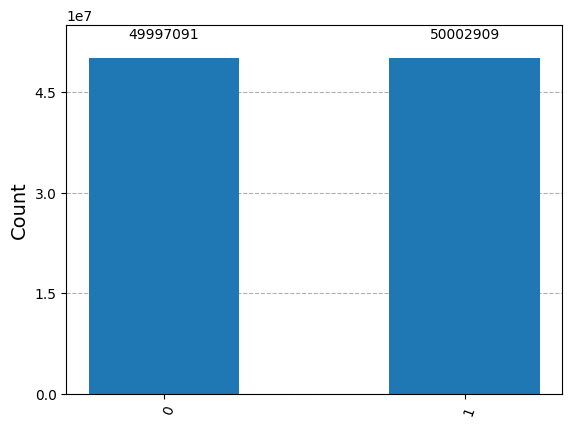

In [22]:
from qiskit import QuantumCircuit, transpile

# Step 1: Create a simple quantum circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Step 2: Use AerSimulator backend
backend = AerSimulator()

# Step 3: Transpile the circuit for the backend
tqc = transpile(qc, backend)

# Step 4: Run the transpiled circuit
job = backend.run(tqc, shots=100000000)
result = job.result()

# Step 5: Get and print counts
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

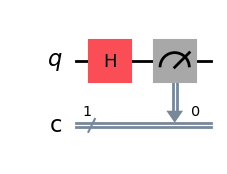

In [23]:
qc.draw('mpl')

In [24]:
print(qc)

     ┌───┐┌─┐
  q: ┤ H ├┤M├
     └───┘└╥┘
c: 1/══════╩═
           0 


Exercise 2: Bell State (Entanglement)

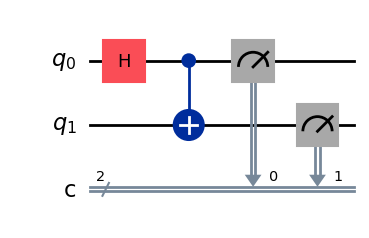

In [25]:
qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0, 1)
qc.measure([0, 1], [0, 1])
qc.draw('mpl')

{'11': 515, '00': 485}


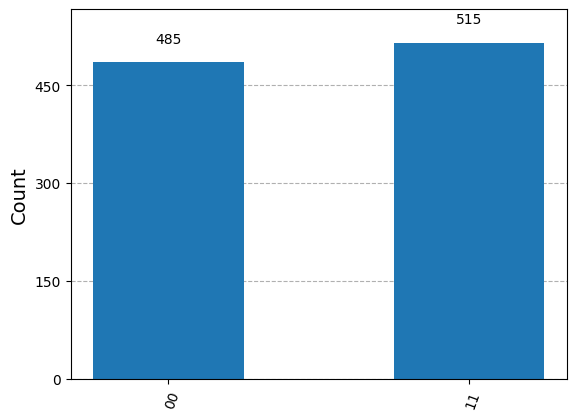

In [26]:
# Use AerSimulator backend
backend = AerSimulator()

#  Transpile the circuit for the backend
tqc = transpile(qc, backend)

#  Run the transpiled circuit
job = backend.run(tqc, shots=1000)
result = job.result()

#  Get and print counts
counts = result.get_counts()
print(counts)

from qiskit.visualization import plot_histogram
plot_histogram(counts)

Exercise 3: Custom Gate Sequence Goal: Apply the following sequence
X→H→Z→H

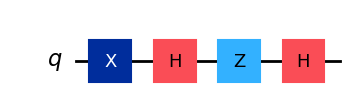

In [27]:
qc1 = QuantumCircuit(1)
qc1.x(0)
qc1.h(0)
qc1.z(0)
qc1.h(0)
qc1.draw('mpl')


In [28]:
qc1.save_statevector() 
sim = AerSimulator()
job = sim.run(qc1)
result = job.result()
statevector = result.get_statevector()
print(statevector)
## statevector.draw('latex', prefix=r'\ket{\psi}=')

Statevector([1.-1.8369702e-16j, 0.+6.1232340e-17j],
            dims=(2,))


Exercise 4: Build and Simulate a Custom QFT (2 qubits)


Statevector([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j],
            dims=(2, 2))


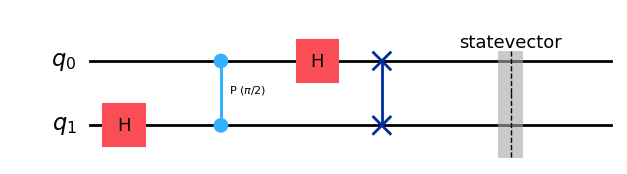

In [29]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit_aer import Aer

qc = QuantumCircuit(2)


# Inline QFT for 2 qubits
qc.h(1)
qc.cp(np.pi/2, 0, 1)
qc.h(0)
qc.swap(0, 1)

qc.save_statevector()

sim = Aer.get_backend('aer_simulator')
result = sim.run(qc).result()
statevector = result.data(0)['statevector']
print(statevector)

# Draw the circuit
qc.draw('mpl')